<a href="https://colab.research.google.com/github/vanleiko/Biopythn/blob/main/Biopython.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**É necessário ter conhecimento básico de Python e Programação Orientada a Objeto**



---
#**Biopython - Meterial utilizado:**

Documentação do módulo *Bio.Seq*: https://biopython.org/docs/1.75/api/Bio.Seq.html

Documentação da classe *Seq*: https://biopython.org/wiki/Seq
___ 

#<font color="green"> **1 Instalação da biblioteca Biopython aqui no notebook**
- Primeiro é preciso instalar a biblioteca Biopython rodando o comando abaixo:

In [ ]:
 !pip install biopython

     |████████████████████████████████| 2.3MB 2.8MB/s 


#<font color="green">  **2 Fita complementar, transcrição e tradução do DNA**

- Sem dúvidas, a matéria prima principal da bioinformática é a sequência! Vamos ver como lidar com elas.
- As sequências são um conjunto de letras do tipo **string**, por exemplo "ATGCATGCATGC". Porém, isso é apenas um conjunto de letras sem significado e, por isso, precisamos "transformá-las" em uma sequência biológica na qual os métodos da biblioteca Biopython poderão ser aplicados.
- Para isso, as sequências são trabalhadas como **objetos** da classe *Seq*. Devemos sempre fazer sua importação: <font color="red">*from Bio.Seq import Seq* </font>.

In [ ]:
# do módulo Bio.Seq, importamos a classe Seq
from Bio.Seq import Seq  

In [ ]:
# declaramos a nossa sequência de interesse (por exemplo "ATGCATGCATGC") como um objeto de Seq e guardamos na variável meu_dna
meu_dna = Seq("ATGCATGCATGC")   

# a variável meu_dna contém nosso objeto
meu_dna   

Seq('ATGCATGCATGC')

###**2.1 Sequência complementar e complementar reversa**
- Agora que nossa sequência é um **objeto** da classe *Seq*, podemos usar os métodos que essa classe nos fornece. Vamos ver alguns exemplos:
- Para começarmos, vamos achar a sequência complementar, e o reverso da complementar, da nossa sequência de DNA. Para isso, a classe *Seq* fornece os métodos *.complement()* e *.reverse_complement()*, respectivamente.

In [ ]:
# esse método retorna a sequência complementar do nosso DNA
meu_dna.complement()  

Seq('TACGTACGTACG')

Esse método não altera a sequência original. Você pode então salvar sua sequência complementar em uma nova variável:

In [ ]:
# meu_dna_complementar é a nossa nova variável
meu_dna_complementar = meu_dna.complement()

# repare que o sentido da sequência complementar aqui é 3'-5'
meu_dna_complementar    

Seq('TACGTACGTACG')

E a nossa sequência original permaneceu a mesma:

In [ ]:
meu_dna

Seq('ATGCATGCATGC')

Agora vamos obter o reverso da sequência complementar:

In [ ]:
# aqui a sequência complementar é no sentido 5'-3'
meu_dna.reverse_complement()    

Seq('GCATGCATGCAT')

<font color="red"> *>>> Lembre-se que toda síntese, tanto de DNA quanto de RNA, é feita no sentido 5'-3'* </font>

<font color="green">Observação</font>: se sua sequência é uma fita de RNA, você também pode achar a sequência de RNA complementar usando o método *.complement_rna()*

In [ ]:
# declaramos nossa sequência de RNA "AUGCAUGCAUGC" como um objeto de Seq
meu_rna = Seq("AUGCAUGCAUGC")  

# aqui teremos nossa sequência complementar de RNA
meu_rna.complement_rna()

Seq('UACGUACGUACG')

###**2.2 Transcrição da sequência**
- Agora vamos transcrever nossa sequência de DNA e achar sua sequência de RNA correspondente (o transcrito), usando o método *.transcribe()* e iremos salvá-la em uma nova variável:

In [ ]:
# transcrever nossa sequência e salvar na variável 'transcrito'
transcrito = meu_dna.transcribe()
transcrito

Seq('AUGCAUGCAUGC')

Também podemos transcrever a sequência de volta, ou seja, do RNA para DNA, usando o método *.back_transcribe()*

In [ ]:
# transcrevendo do RNA de volta para DNA
transcrito.back_transcribe()

Seq('ATGCATGCATGC')

<font color="red"> >>> Relembrando alguns conceitos:</font>

<font color="green">*Fita molde*</font> é a fita de DNA que servirá como molde para a síntese do RNA.

<font color="green">*Fita codificadora*</font> é a fita de DNA com sequência idêntica ao RNA transcrito, exceto pelas bases U e T.

Portanto, se a sequência de DNA utilizada é "ATGCATGCATGC" e o transcrito retornado pelo método *.transcribe()* é "AUGCAUGCAUGC", significa que *nossa fita de DNA é a fita codificadora!*

Se quiser obter a fita molde a partir da sequência de RNA, podemos fazer:


In [ ]:
# pegamos nosso transcrito, transcrevemos de volta para DNA e por último obtemos a fita complementar reversa (que é a fita molde)
transcrito.back_transcribe().reverse_complement()

Seq('GCATGCATGCAT')

###**2.3 Tradução da sequência**
- Aqui iremos obter a sequência de aminoácidos (suas abreviações com uma letra). Primeiro vamos fazer a tradução a partir da fita de RNA mensageiro, utilizando o método *.translate()*

In [ ]:
# nossa sequência de RNA
meu_rna = Seq("AUACGUAUUGGAUUUAUA") 

# obter a proteína a partir do RNA e salvar na variável 'proteina_rna'
proteina_rna = meu_rna.translate()  
proteina_rna

Seq('IRIGFI')

Esse método reconhece os stop codons. Vamos utilizar o stop codon "UGA" no final da sequência como exemplo e você verá que o método retornará um asterisco (por padrão) representando o codon de parada:

In [ ]:
# sequência de RNA com stop codon 'UGA' no final
meu_rna_stop = Seq("AUACGUAUUGGAUUUAUAUGA") 

# tradução da nossa sequência de RNA
proteina_rna_stop = meu_rna_stop.translate()

# repare que 'UGA' é representado por * 
proteina_rna_stop 

Seq('IRIGFI*')

Mas e se o stop codon estiver no meio da sequência? Aqui temos 2 opções:

a) podemos fazer com que a tradução seja interrompida no codon de parada ao estabelecermos o argumento <font color="blue"> *to_stop=True* </font>.

b) podemos continuar com a tradução mesmo após o codon de parada, o qual será representado pelo asterisco. Aqui o argumento <font color="blue"> *to_stop=False* </font> já vem como valor padrão do método.

In [ ]:
# colocamos o 'UGA' no meio da sequência
meu_rna_stop2 = Seq("AUACGUAUUUGAGGAUUUAUA")  

# a tradução será interrompida quando encontrar o stop codon "UGA"
proteina2 = meu_rna_stop2.translate(to_stop=True) 
proteina2   

Seq('IRI')

In [ ]:
# a tradução aqui não será interrompida, já que 'to_stop=False' por padrão
proteina2 = meu_rna_stop2.translate()  
proteina2   

Seq('IRI*GFI')

Também é possível fazer a tradução diretamente da fita de DNA:


In [ ]:
proteina_dna = meu_dna.translate()
proteina_dna

Seq('MHAC')

#<font color="green"> **3 Métodos gerais**

Nessa seção, veremos alguns métodos  utilizados nos **objetos** da classe *Seq* e que agem como se fossem métodos usados em strings em Python. 

###**3.1 .find()** 
- serve para localizarmos um trecho em uma sequência, retornando o índice do primeiro nucleotídeo (lembre-se que a contagem em Python começa pelo zero). Se o trecho procurado não estiver na sequência, o método retornará -1:

In [ ]:
from Bio.Seq import Seq

# declaramos nossa sequência como objeto da classe Seq e salvamos na variável meu_dna
meu_dna = Seq("AATGGCTTCGGA")

# passamos o trecho de DNA procurado 'GGC' para o método .find()
meu_dna.find("GGC")


3

In [ ]:
# se passarmos um trecho que não existe na nossa sequência, o método retorará -1
meu_dna.find("AAA")

-1

###**3.2 .index()**
- semelhante ao *.find()*, porém retorna <font color="red"> ValueError </font>se o trecho não é encontrado:

In [ ]:
meu_dna.index("GGC")

3

In [ ]:
# irá retornar um erro
meu_dna.index("AAA")  

ValueError: ignored

###**3.3 .count()**
- conta a quantidade de uma base na sequência

In [ ]:
# contando as adeninas da sequência
meu_dna.count("A")


3

In [ ]:
# contando as citosinas da sequência
meu_dna.count("C")

2

**Cuidado** com as sobreposições *(overlap)* de nucleotídeos! Esse método não conta as sobreposições. Para isso, utilize *.count_overlap()*. Observe os exemplos:

In [ ]:
# vamos declarar uma nova sequência 
minha_sobreposicao = Seq("AAAATCGTA")

# vamos usar o método para contar 'AA' 
minha_sobreposicao.count("AA")  

2

In [ ]:
# se usarmos o método .count_overlap(), repare que ele conta as sobreposições
minha_sobreposicao.count_overlap("AA")  

3

###**3.4 .startswith()**
- retorna *True* se a sequência iniciar com o trecho dado, ou *False* caso contrário:


In [ ]:
# relembrando nossa sequência
meu_dna   

Seq('AATGGCTTCGGA')

In [ ]:
meu_dna.startswith("AAT")

True

In [ ]:
meu_dna.startswith("ATG")

False

###**3.5 .endsswith()**
- retorna *True* se a sequência terminar com o trecho dado, ou *False* caso contrário:

In [ ]:
meu_dna.endswith("CGGA")

True

In [ ]:
meu_dna.endswith("CGGU")

False

###**3.6 .split()**
- retorna uma lista de strings (como **objetos** de *Seq*) usando *sep* como delimitador. 

No exemplo, vamos pegar um RNA, traduzi-lo em uma proteina e depois usar como delimitador os stop codons (*):

In [ ]:
# vamos colcocar os stop codons 'UAA' e 'UGA' no meio da sequência
rna = Seq("AUUGGUACGUAAGGCAGCGUGUGAUAUCCGGGG")

# traduzindo nossa sequência
proteina = rna.translate()
proteina

Seq('IGT*GSV*YPG')

In [ ]:
# agora vamos quebrar nossa sequência de aminoácidos usando os stop codons(*) como delimitadores
proteina.split(sep="*")

# repare que o método devolveu uma lista com nossos trechos como objetos de Seq

[Seq('IGT'), Seq('GSV'), Seq('YPG')]

###**3.7 .strip()**
- remove os espaços do começo e do final da sequência

In [ ]:
# vamos declarar uma sequência com espaços em branco no começo e no final
meu_dna = Seq(' AATGGCTTCGGA ')

# chamamos o método .strip(chars= ' ') para removers os espaços (' ') em branco
meu_dna.strip(chars=' ')


Seq('AATGGCTTCGGA')

In [ ]:
# vamos declarar uma sequência com '-' no início e no final'
meu_dna = Seq('-AATGGCTTCGGA-')

# chamamos o método .strip(chars= '-') para removers os ('-') 
meu_dna.strip(chars='-')

Seq('AATGGCTTCGGA')

###**3.8 .join()**
- intercala uma lista de string com um intercalador:

In [ ]:
# declaramos nosso intercalador
intercalador = Seq("AAA")

# criamos uma lista com trechos
lista = ["GGGG", "TTTT", "CCCC"]

# o método .join() irá juntar os trechos, usando o intercalador entre eles
intercalador.join(lista)

Seq('GGGGAAATTTTAAACCCC')

###**3.9 .upper()**
- retorna todas as letras em maiúsculo:

In [ ]:
sequencia = Seq("aaAAaTttGGgggcccccCC")
sequencia.upper()

Seq('AAAAATTTGGGGGCCCCCCC')

###**3.10 .lower()**
- retorna todas as letras em minúsculo:

In [ ]:
sequencia = Seq("aaAAaTttGGgggcccccCC")
sequencia.lower()

Seq('aaaaatttgggggccccccc')

#<font color="green"> **4 Sequências**

###**4.1 Concatenando sequências**
- para unir sequências, podemos usar o operador "+" que, quando aplicado a strings, faz a concatenação:

In [ ]:
# vamos criar quatro sequências
seq1 = Seq("AAAA")
seq2 = Seq("CCCC")
seq3 = Seq("GGGG")
seq4 = Seq("TTTT")

# concatenando as quatro sequências e salvando numa variável
sequencia_concatenada = seq1 + seq2 + seq3 + seq4
sequencia_concatenada 

Seq('AAAACCCCGGGGTTTT')

###**4.1 Comparando sequências**
- para comparar sequências, podemos usar o operador "==":

In [ ]:
# vamos criar essas três sequências
seq1 = Seq("AAAACCCC")
seq2 = Seq("GGGGCCCC")
seq3 = Seq("AAAACCCC")

# comparando seq1 com seq2
if seq1 == seq2:
  print("São iguais")
else:
  print("Não são iguais")


Não são iguais


In [ ]:
# comparando seq1 com seq3
if seq1 == seq3:
  print("São iguais")
else:
  print("Não são iguais")

São iguais


###**4.2 Verificando se uma sequência contém um trecho específico**
- para verificar se um trecho de nucleotídeos está presente em uma sequência, usamos "in"

*(pode parecer semelhante ao .find(), porém o "in" retorna um valor booleano True ou False, enquanto .find() retorna um índice)*

In [ ]:
# trecho de interesse
trecho = Seq("AATT")

# sequência que queremos buscar o trecho
sequencia = Seq("ATCGATGCTGACAATTGTCGATCGAAT")

trecho in sequencia


True

In [ ]:
# podemos também imprimir uma mensagem 
if trecho in sequencia:
  print("A sequência possui esse trecho")
else:
  print("Esse trecho não está presente na sequência")

A sequência possui esse trecho


#<font color="green"> **5 Criando gráficos**

- Iremos usar as bibliotecas Matplotlib e Seaborn:

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns


- Vamos definir nossa sequência de interesse, a qual será usada para a construção dos gráficos:

In [ ]:
# essa será nossa sequência
meu_dna = "CCACCCTCGTGGTATGGCTAGGCATTCAGGAACCGGAGAACGCTTCAGACCAGCCCGGACTGGGAACCTGCGGGCAGTAGGTGGAAT"

# vamos garantir que todas as letras estejam em maiúsculo para evitar possíveis erros 
meu_dna = meu_dna.upper()  


###**5.1 Quantidade de nucleotídeos**
- Nosso primeiro gráfico irá representar a quantidade de A, T, G, C presente na sequência de DNA.

- Primeiro iremos criar uma função que conta a quantidade de A T G C e depois definir uma função para criar o gráfico:


In [ ]:
# função que retorna a quantidade de A T G C da sequência:
def conta_nucleotideos(dna): 
  nucleotideos = [dna.count("A"), dna.count("T"), dna.count("G"), dna.count("C")]
  return nucleotideos

# chamando a função e guardando as quantidades na variável nnucleotídeos
nucleotideos = conta_nucleotideos(meu_dna)  

In [ ]:
# verificando as quantidades de cada base
nucleotideos

[20, 14, 29, 24]

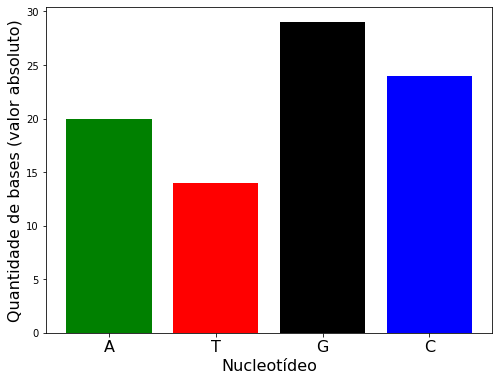

In [ ]:
# função para criar o gráfico que recebe como parâmetros os nucleotídeos
def cria_grafico_nucleotideos(nucleotideos):

# valores do eixo x e suas cores
  nome_bases = ("A", "T", "G", "C")
  cores = ("green", "red", "black", "blue")

# plotando o gráfico e legendas
  plt.figure(figsize=(8,6))
  plt.bar(nome_bases, nucleotideos, color = cores)
  plt.ylabel("Quantidade de bases (valor absoluto)", fontsize = 16)
  plt.xticks(["A", "T", "G", "C"], fontsize = 16)
  plt.xlabel("Nucleotídeo", fontsize = 16);

# chamamos a função
cria_grafico_nucleotideos(nucleotideos)

###**5.2 Proporção de nucleotídeos**
- Esse gráfico irá representar as proporções de A, T, G, C presente na sequência de DNA

- Primeiro iremos criar uma função que retorna a proporção (%) de A T G C e depois definir uma função para criar o gráfico:

In [ ]:
# função que retorna a proporção de A T G C da sequência:
def proporcao_nucleotideos(dna): 

# criamos uma lsita vazia para guardar as proporções
  proporcao = []

# contamos a quantidade de cada base e depois somamos o valor total
  bases = [dna.count("A"), dna.count("T"), dna.count("G"), dna.count("C")]
  total = sum(bases)

# obtemos a proporção de cada base
  for base in bases:
    proporcao.append((base/total) * 100)
  return proporcao

# chamamos a função
proporcao = proporcao_nucleotideos(meu_dna)


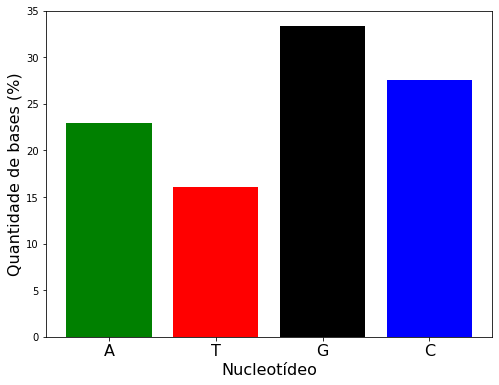

In [ ]:
# função para criar o gráfico com as proporções de A, T, G, C:
def cria_grafico_proporcao_nucleotideos(proporcao):
  nome_bases = ("A", "T", "G", "C")
  cores = ("green", "red", "black", "blue")

  plt.figure(figsize=(8,6))
  plt.bar(nome_bases, proporcao, color=cores)
  plt.ylabel("Quantidade de bases (%)", fontsize = 16)
  plt.xticks(["A", "T", "G", "C"], fontsize = 16)
  plt.xlabel("Nucleotídeo", fontsize = 16);


cria_grafico_proporcao_nucleotideos(proporcao)

###**5.3 Conteúdo GC**
- Vamos agora fazer um gráfico com a porcentagem de guanina e citosina e guanina+citosina presente na sequência de DNA.

- Primeiro iremos criar uma função que retorna a proporção de G, C, G+C e depois uma função para plotar o gráfico:

In [ ]:
# função que retorna a proporção de GC da sequência:
def proporcao_gc(dna): 

# contar e somar G e C
  bases_gc = dna.count("G") + dna.count("C")

# tamanho total da sequência
  total = len(dna)

# obtendo a propoção de GC
  proporcao = (bases_gc / total) * 100

  return proporcao

# chamando a função
gc = proporcao_gc(meu_dna)


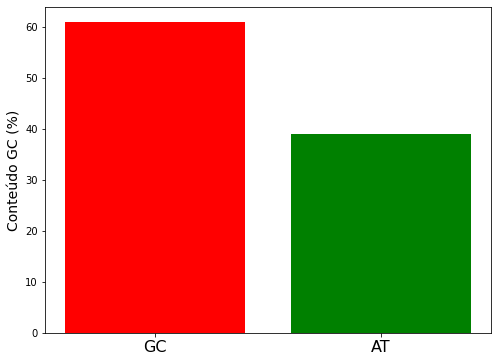

In [ ]:
# função para criar o gráfico com o conteúdo GC x AT:
def cria_grafico_conteudo_gc(gc):

  eixo_x = ("GC", "AT")
  cores = ("red", "green")
  at = 100 - gc
  eixo_y = [gc, at]

  plt.figure(figsize=(8,6))
  plt.bar(eixo_x, eixo_y, color = cores)
  plt.xticks(["GC", "AT"], fontsize = 16)
  plt.ylabel("Conteúdo GC (%)", fontsize = 14)

cria_grafico_conteudo_gc(gc)

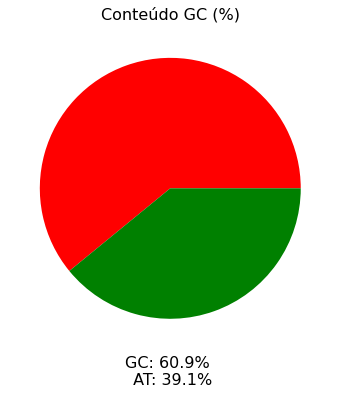

In [ ]:
# função para criar um gráfico em pizza com o conteúdo GC x AT:
def cria_grafico_pizza_conteudo_gc(gc):

  cores = ("red", "green")
  at = 100 - gc
  dados = [gc, at]

  plt.figure(figsize=(8,6))
  plt.pie(dados, colors = cores)
  plt.title("Conteúdo GC (%)", fontsize = 16)
  plt.xlabel("GC: {:.1f}% \n AT: {:.1f}%".format(gc, at), fontsize = 16)

cria_grafico_pizza_conteudo_gc(gc)